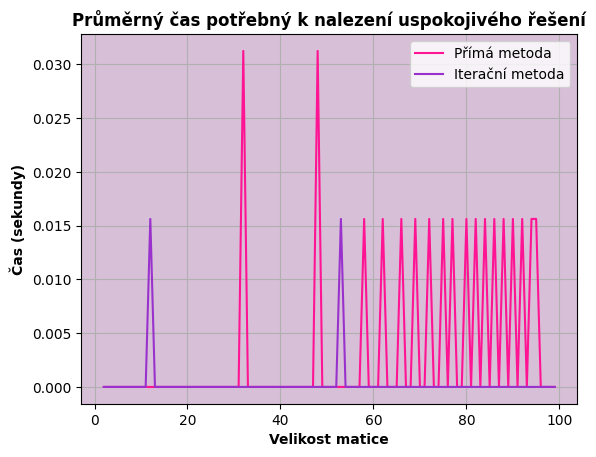

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Gaussova eliminační metoda
def prima_metoda(A, b): 
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)   
    for i in range(pocet_rovnic):
        for j in range(i + 1, pocet_rovnic):
            if rozsirena_matice[i, i] != 0: 
                pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
                rozsirena_matice[j] -= pomer * rozsirena_matice[i]
            else:
                continue 
    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        if rozsirena_matice[i, i] != 0: 
            x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
        else:
            x[i] = np.nan  
    return x

# Iterační metoda
def iteracni_metoda(A, b, max_iterations=10, tol=1e-6):
    n = len(A)
    x = np.zeros(n)
    D = np.diag(A)
    R = A - np.diag(D) 
    for _ in range(max_iterations):
        x_new = (b - np.dot(R, x)) / D
        if np.allclose(x_new, x, atol=tol):
            return x_new 
        x = x_new
    return x_new

def generator_matice(velikost):
    A = np.random.randint(1, 10, size=(velikost,velikost))
    b = np.random.randint(1, 10, size=(velikost))
    return A, b

casy_iteracni_metoda = []
casy_prima_metoda = []
velikost_matice = []

def zjisteni_casu():
    for i in range(2, 100):
        velikost_matice.append(i)
        A, b = generator_matice(i)
        cas_1 = time.process_time()
        prima_metoda(A, b)
        casy_prima_metoda.append(time.process_time() - cas_1)
        cas_2 = time.process_time()
        iteracni_metoda(A, b)
        casy_iteracni_metoda.append(time.process_time() - cas_2)
 
zjisteni_casu()

plt.plot(velikost_matice, casy_prima_metoda, label="Přímá metoda", color="deeppink")
plt.plot(velikost_matice, casy_iteracni_metoda, label="Iterační metoda",color="darkorchid")
plt.xlabel("Velikost matice", fontweight="bold")
plt.ylabel("Čas (sekundy)", fontweight="bold")
plt.gca().set_facecolor("thistle")
plt.title("Průměrný čas potřebný k nalezení uspokojivého řešení", fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


# Dle tohoto konkrétního výsledku je iterační metoda časově výhodnější od matice o rozměrech přibližně 65x65 